<a href="https://colab.research.google.com/github/GioLeo23/Energy-Consumption-Forecast/blob/main/Energy_consumption_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [2]:
import io
from google.colab import files
uploaded = files.upload()

Saving PJME_hourly.csv to PJME_hourly.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['PJME_hourly.csv']))

In [4]:
df = df.set_index('Datetime')

In [5]:
df.index = pd.to_datetime(df.index)

In [6]:
train = df.loc[df.index < '06-06-2014']
test = df.loc[df.index >= '06-06-2014']

In [15]:
def features(df):
  df = df.copy()
  df['hour'] = df.index.hour
  df['day_of_the_week'] = df.index.day_of_week
  df['month'] = df.index.month
  df['year'] = df.index.year
  df['day_of_year'] = df.index.day_of_year
  df['quarter'] = df.index.quarter
  return df


In [16]:
df = features(df)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='month', ylabel='PJME_MW'>

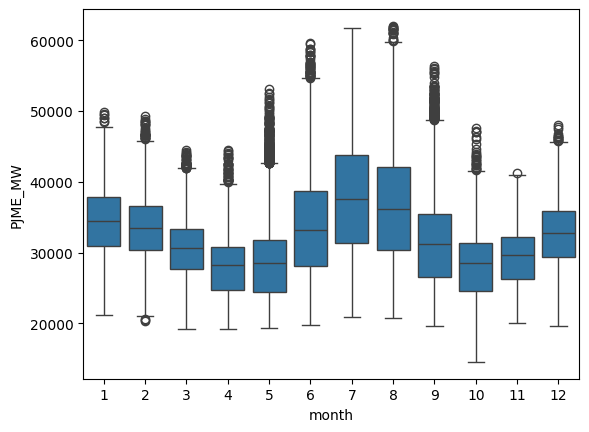

In [14]:
sns.boxplot(data=df, x='month', y='PJME_MW')

In [17]:
from sklearn.metrics import mean_squared_error

train = features(train)
test = features(test)
FEATURES = ['hour', 'day_of_the_week', 'month', 'year', 'day_of_year', 'quarter']
TARGET = 'PJME_MW'

X_train = train[FEATURES]
y_train = train[TARGET]
X_test = test[FEATURES]
y_test = test[TARGET]

model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.01)
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100)

[0]	validation_0-rmse:6410.77155	validation_1-rmse:6464.27400
[100]	validation_0-rmse:3901.95666	validation_1-rmse:4265.84699
[200]	validation_0-rmse:3233.35254	validation_1-rmse:3809.99806
[300]	validation_0-rmse:2989.29702	validation_1-rmse:3686.23175
[400]	validation_0-rmse:2820.76784	validation_1-rmse:3631.19667
[500]	validation_0-rmse:2692.70080	validation_1-rmse:3647.67249
[600]	validation_0-rmse:2598.72425	validation_1-rmse:3694.48394
[700]	validation_0-rmse:2528.73755	validation_1-rmse:3741.26979
[800]	validation_0-rmse:2467.24764	validation_1-rmse:3780.48215
[900]	validation_0-rmse:2410.48081	validation_1-rmse:3809.38305
[999]	validation_0-rmse:2360.02385	validation_1-rmse:3825.14521


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

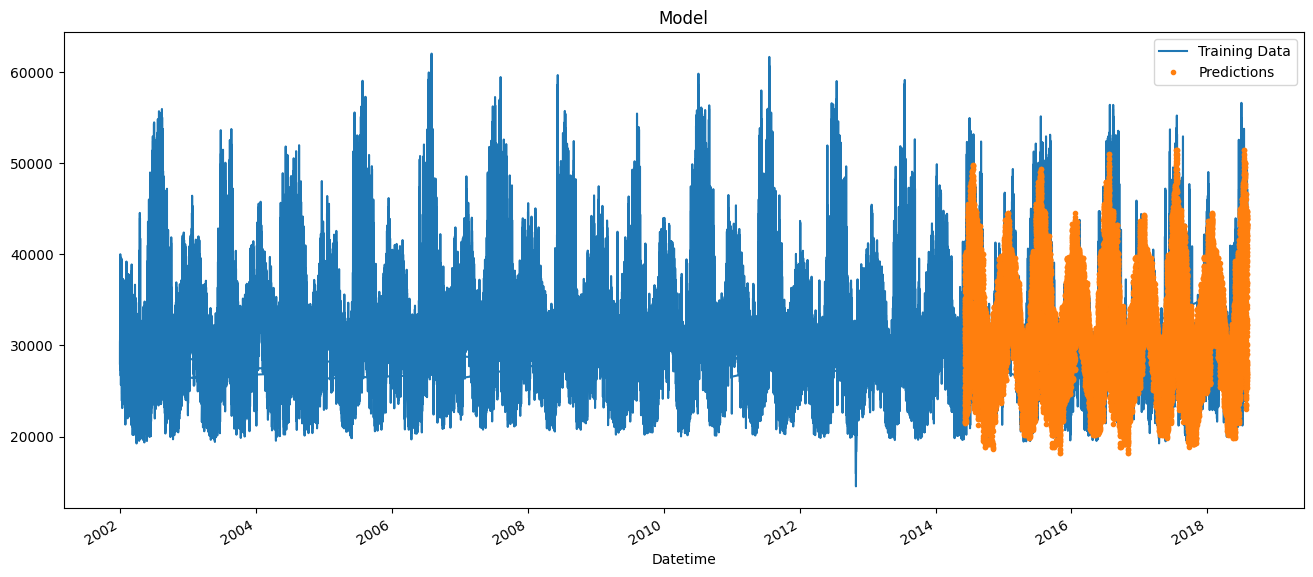

In [18]:
test['prediction'] = model.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['PJME_MW']].plot(figsize=(16, 7))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Training Data', 'Predictions'])
ax.set_title('Model')
plt.show()